In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [19]:
data_dir=r"C:\Users\ymts0427\Desktop\Projects\DL\TK70884 - Satellite Image Classification Method Using CNN\Backend\Dataset"
images=[]
for file in os.listdir(data_dir):
    images+=[file]
print(images)
print(len(images))

['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
21


In [3]:
img_height,img_width=256,256
batch_size=20

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 7350 images belonging to 21 classes.
Found 3150 images belonging to 21 classes.


In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 96)        8

In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)

C:\Users\ymts0427\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
368/368 [==============================] - 415s 1s/step - loss: 2.6100 - accuracy: 0.1758 - val_loss: 2.0473 - val_accuracy: 0.3327
Epoch 2/20
368/368 [==============================] - 413s 1s/step - loss: 1.6284 - accuracy: 0.4781 - val_loss: 1.6184 - val_accuracy: 0.4841
Epoch 3/20
368/368 [==============================] - 406s 1s/step - loss: 0.9102 - accuracy: 0.7030 - val_loss: 1.5413 - val_accuracy: 0.5203
Epoch 4/20
368/368 [==============================] - 407s 1s/step - loss: 0.3266 - accuracy: 0.8978 - val_loss: 2.0012 - val_accuracy: 0.5171
Epoch 5/20
368/368 [==============================] - 406s 1s/step - loss: 0.1595 - accuracy: 0.9514 - val_loss: 2.4337 - val_accuracy: 0.5438
Epoch 6/20
368/368 [==============================] - 2301s 6s/step - loss: 0.0832 - accuracy: 0.9743 - val_loss: 3.0696 - val_accuracy: 0.5067
Epoch 7/20
368/368 [==============================] - 408s 1s/step - loss: 0.0792 - accuracy: 0.9741 - val_loss: 2.8741 - val_accuracy: 0.528

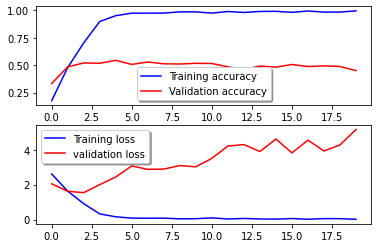

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [8]:
model.evaluate(test_generator)
model.save("webapp/CNN.h5")

158/158 [==============================] - 42s 267ms/step - loss: 5.1562 - accuracy: 0.4505


In [9]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(21, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 8, 8, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                65600     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 21)                1365      
Total params: 3,296,085
Trainable params: 3,274,069
Non-trainable params: 22,016
_______________________________________

In [10]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=15,validation_data=test_generator,verbose=1)

Epoch 1/15
368/368 [==============================] - 945s 3s/step - loss: 0.6458 - accuracy: 0.8214 - val_loss: 0.4651 - val_accuracy: 0.8546
Epoch 2/15
368/368 [==============================] - 934s 3s/step - loss: 0.2659 - accuracy: 0.9241 - val_loss: 0.5146 - val_accuracy: 0.8337
Epoch 3/15
368/368 [==============================] - 45888s 125s/step - loss: 0.1827 - accuracy: 0.9439 - val_loss: 0.3828 - val_accuracy: 0.8889
Epoch 4/15
368/368 [==============================] - 1125s 3s/step - loss: 0.1553 - accuracy: 0.9518 - val_loss: 0.2892 - val_accuracy: 0.9117
Epoch 5/15
368/368 [==============================] - 1055s 3s/step - loss: 0.1415 - accuracy: 0.9565 - val_loss: 0.3967 - val_accuracy: 0.8832
Epoch 6/15
368/368 [==============================] - 1101s 3s/step - loss: 0.1343 - accuracy: 0.9581 - val_loss: 0.2611 - val_accuracy: 0.9254
Epoch 7/15
368/368 [==============================] - 1030s 3s/step - loss: 0.1073 - accuracy: 0.9682 - val_loss: 0.1364 - val_accuracy

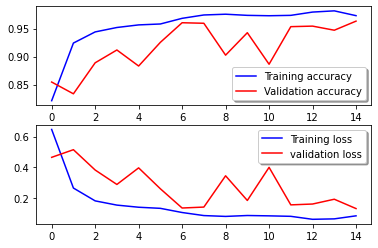

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
model1.evaluate(test_generator)
model1.save("webapp/Mobilenet.h5")

158/158 [==============================] - 78s 496ms/step - loss: 0.1328 - accuracy: 0.9632


In [13]:
Accuracy = []

for i in [hist, hist1]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.9953741431236267, 0.9729251861572266]

[0.5320829  0.27300343 1.         0.59268856 0.75516856 0.11692116
 0.04626894 0.3182267  0.22213256 0.20948568 0.28719604 0.6590308
 0.11519945 0.38853997 0.86558014 0.00300053 0.64817464 0.7666528
 0.57861704 0.8014966  0.95478296]


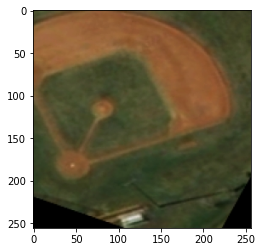

Prediction: baseballdiamond


In [20]:
from skimage import io
from keras.preprocessing import image

img = image.load_img(r'Dataset\baseballdiamond\baseballdiamond_000001.jpg', grayscale=False, target_size=(256,256))
show_img=image.load_img(r'Dataset\baseballdiamond\baseballdiamond_000001.jpg', grayscale=False, target_size=(256, 256))
images = images
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',images[ind])